https://nbviewer.org/github/vincent1bt/Healthy-notebooks/blob/master/CT_images.ipynb

In [1]:
import pydicom as dcm
import os
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from segment_brain import segment
from tqdm import tqdm
import re
from CT_DATASET_module import *


In [2]:
PATH_WITH_ALL_SCANS = r'C:\Users\user1\Desktop\MORE_OR_EQ_'
PATH_WITH_ALL_SCANS = r'C:\Users\user1\Desktop\WIDE_RANGE'
desired_volume_dims_after_resampling = (120,256,256)
THRESHOLD = 20

In [3]:
all_patients =CT_DATASET(PATH_WITH_ALL_SCANS,desired_volume_dims_after_resampling)

THis works for 'C:\Users\user1\Desktop\PAGNI_TEST' forlder. each patient has slices only and not inner folder

  0%|          | 0/3 [00:00<?, ?it/s]

the type of scan is: Brain 1.25 mm
The actual shape of the scan is: (128, 512, 512)


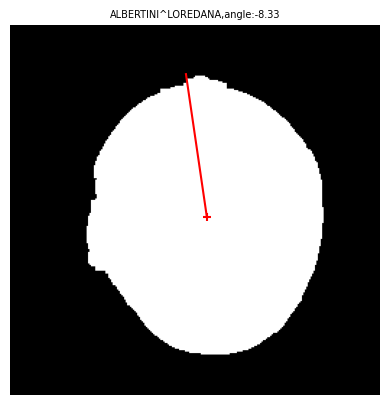

 33%|███▎      | 1/3 [00:28<00:56, 28.34s/it]

the initial angle is:  -8.329856001450878
patient's name:ALBERTINI^LOREDANA,patient's sex:F,patients'age:42,Glasgow Coma Scale:NA
----------------------------------------------------------------------------------------------------
the type of scan is: Brain 1.25 mm SOFT
The actual shape of the scan is: (136, 512, 512)


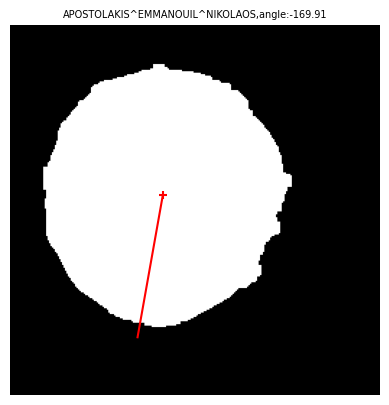

the initial angle is:  -169.9117060355945
procceding rotation... <-14 degrees
angle in perpenticular plane: -169.9117060355945


 67%|██████▋   | 2/3 [00:56<00:28, 28.01s/it]

patient's name:APOSTOLAKIS^EMMANOUIL^NIKOLAOS,patient's sex:M,patients'age:77,Glasgow Coma Scale:TEST
the type of scan is: RoutineSeq  1.5  H30s
The actual shape of the scan is: (108, 512, 512)


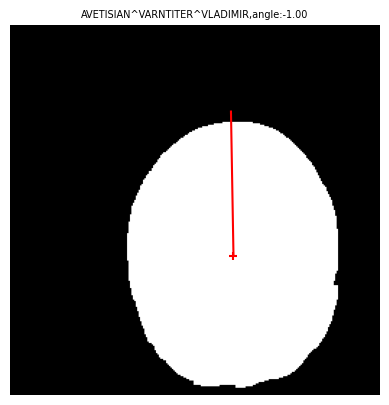

100%|██████████| 3/3 [01:18<00:00, 26.04s/it]

the initial angle is:  -1.0021564835347476
patient's name:AVETISIAN^VARNTITER^VLADIMIR,patient's sex:F,patients'age:20,Glasgow Coma Scale:15
----------------------------------------------------------------------------------------------------


(3,)

In [4]:



patients = []
for patient in tqdm(os.listdir(PATH_WITH_ALL_SCANS)[:3]):  
# for patient in tqdm(os.listdir(PATH_WITH_ALL_SCANS)):    
        # for folder in os.listdir(os.path.join(PATH_WITH_ALL_SCANS,patient)):
    patients.append(all_patients.process_scan(os.path.join(PATH_WITH_ALL_SCANS,patient),patient))

patients = np.array(patients)
patients.shape

THis works for 'E:\PAGNI_CT_DEDOMENA\NORMAL'  forlder. each patient has  inner folders

In [4]:

# PATH_WITH_ALL_SCANS = r'E:\PAGNI_CT_DEDOMENA\NORMAL'  
# patients = []
# for patient in tqdm(os.listdir(PATH_WITH_ALL_SCANS)[10:13]):  
# # for patient in tqdm(os.listdir(PATH_WITH_ALL_SCANS)):    
#         for folder in os.listdir(os.path.join(PATH_WITH_ALL_SCANS,patient)):
#             patients.append(all_patients.process_scan(os.path.join(PATH_WITH_ALL_SCANS,patient,folder)))

# patients = np.array(patients)
# patients.shape

  0%|          | 0/3 [00:00<?, ?it/s]

The actual shape of the scan is: (160, 512, 512)


 33%|███▎      | 1/3 [00:38<01:16, 38.28s/it]

patient's name:ANTONANAKIS^KONSTANTINOS^MICHAIL,patient's sex:M,patients'age:77
The actual shape of the scan is: (136, 512, 512)


 67%|██████▋   | 2/3 [01:07<00:32, 32.72s/it]

patient's name:ANTONAKAKIS^MICHAIL^IOANNIS,patient's sex:M,patients'age:72
The actual shape of the scan is: (124, 512, 512)


100%|██████████| 3/3 [01:33<00:00, 31.23s/it]

patient's name:ANTONIOU^ASIMINA^EVANGELOS,patient's sex:F,patients'age:51


(3,)

In [9]:
patients

array([{'volume': array([[[-2.01160683e-107, -6.09039585e-108, -9.39201248e-107, ...,
                 7.03693540e-106,  2.85282369e-106, -2.76784189e-106],
               [ 2.23526809e-107,  1.11140245e-106, -1.52583273e-107, ...,
                -1.94293311e-095, -1.73583561e-096, -2.71029079e-106],
               [ 1.92751335e-106,  1.59840250e-106,  5.92785521e-106, ...,
                -2.17473880e-094, -1.94293311e-095, -1.28878478e-105],
               ...,
               [-5.25983842e-127, -7.24075443e-119, -8.10462779e-118, ...,
                 2.13025966e-090,  1.90319500e-091, -1.51250302e-103],
               [-1.09068260e-127, -6.46896097e-120, -7.24075473e-119, ...,
                 1.90319500e-091,  1.70033319e-092,  9.71377910e-104],
               [ 1.50944271e-127,  2.72376453e-127,  6.01431385e-127, ...,
                -2.33463741e-103, -1.95929309e-104,  2.00571491e-104]],

              [[-3.38081229e-108, -4.08223582e-107, -2.72043853e-106, ...,
                

In [5]:
patients[0].keys()

dict_keys(['volume', 'name', 'sex', 'age', 'Glasgow Coma Scale'])

In [6]:
all_sclices = np.array([patients[i]['volume']  for i in range(len(patients)) ])
all_sclices.shape

(3, 120, 256, 256)

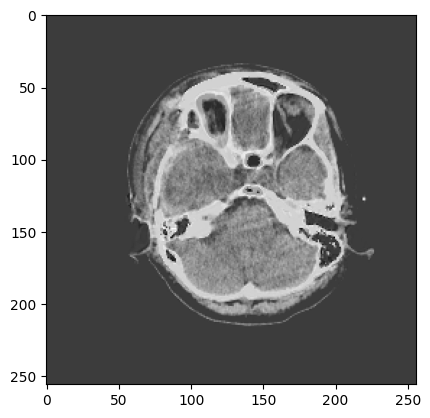

In [7]:
plt.imshow(all_sclices[0,25],cmap='gray')

In [8]:
all_sex =np.array([patients[i]['sex']  for i in range(len(patients)) ])
all_sex

array(['F', 'M', 'F'], dtype='<U1')

(<matplotlib.image.AxesImage at 0x1706e1ec910>,
 Text(0.5, 1.0, 'otsu_threshold_value:101.0'))

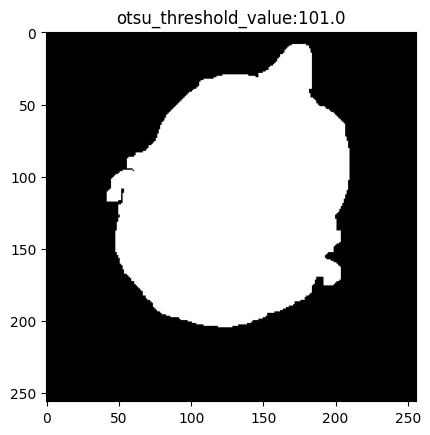

In [9]:
# Apply Otsu's thresholding & decide from one slide
otsu_threshold_value, otsu_threshold_image = cv2.threshold(all_sclices[1,25,:,:].astype('uint8'),all_sclices.min(),all_sclices.max(),cv2.THRESH_OTSU)

thresholded = all_sclices>otsu_threshold_value

thresholded = all_sclices>THRESHOLD
mask = np.vectorize(segment, signature='(n,m)->(n,m)')(thresholded)
plt.imshow(mask[0,23],cmap='gray'),plt.title("otsu_threshold_value:{}".format(otsu_threshold_value))


Angle of the y-axis (perpendicular): 28.92 degrees


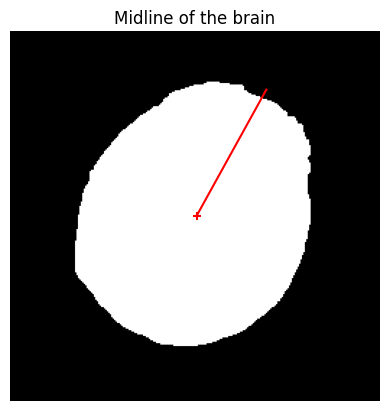

(<Axes: >, <matplotlib.image.AxesImage at 0x170150fd490>)

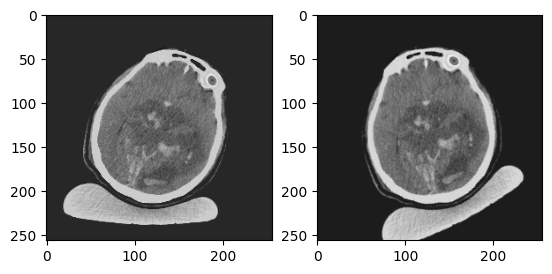

In [10]:
from find_midline import midline
SLICE=55
PATIENT =0

angle = midline(mask,PATIENT,SLICE)

plt.subplot(1,2,1),plt.imshow(all_sclices[0,55],cmap='gray')
plt.subplot(1,2,2),plt.imshow(align_image((all_sclices[0,55]),angle),cmap='gray')

PATIENT: 1
SLICE: 54 / 120


(<Axes: title={'center': 'float64'}>,
 Text(0.5, 1.0, 'float64'))

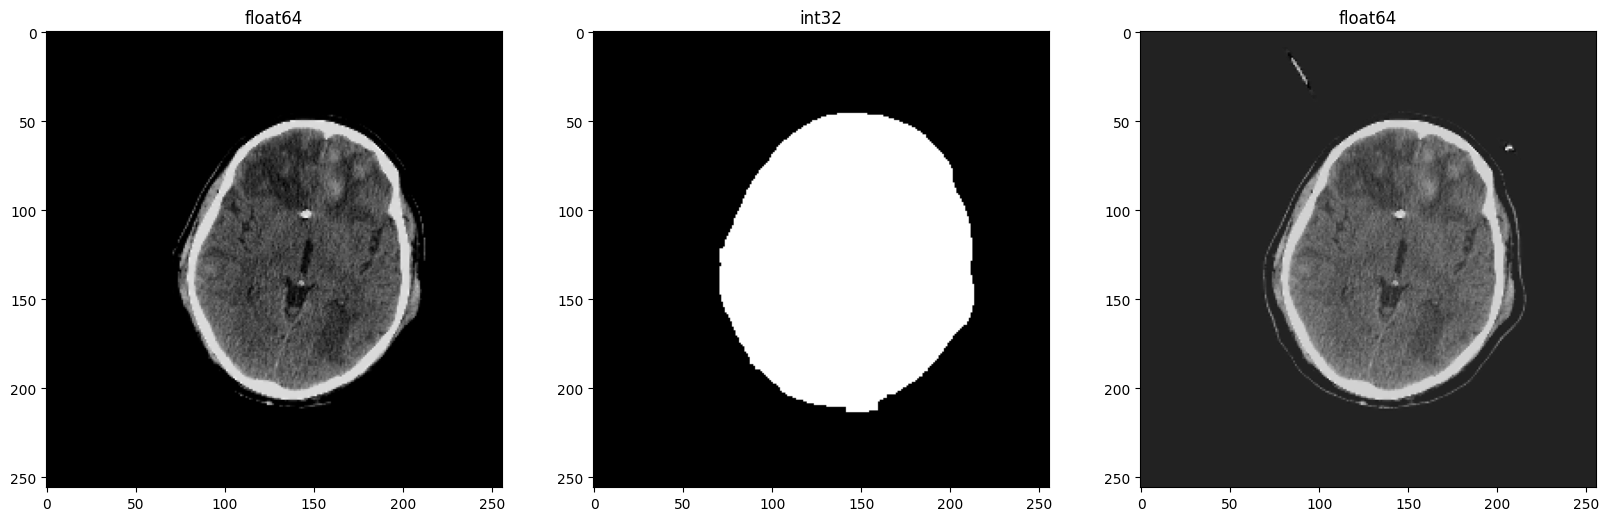

In [29]:
SLICE = np.random.randint(0,all_sclices.shape[1])
PATIENT = np.random.randint(0,all_sclices.shape[0]) 
fig = plt.figure(figsize=(20,10))
mask = np.array(mask,dtype='int32')
print("PATIENT:",PATIENT)
print("SLICE:",SLICE,"/",all_sclices.shape[1])
brain_mask = all_sclices*mask
brain_mask[brain_mask<=0]=0 ############# εγω τυο βαζω αυτό για να ειναι η απόλυτη μάσκα
plt.subplot(1,3,1),plt.imshow(brain_mask[PATIENT,SLICE],cmap='gray'),plt.title(brain_mask.dtype)
plt.subplot(1,3,2),plt.imshow(mask[PATIENT,SLICE],cmap='gray'),plt.title(mask[PATIENT,SLICE].dtype)
plt.subplot(1,3,3),plt.imshow(all_sclices[PATIENT,SLICE],cmap='gray'),plt.title(all_sclices[PATIENT,SLICE].dtype)
# fig.savefig("figure")

HOW TO EXTRACT BRAIN ONLY

(<Axes: title={'center': 'BRAIN'}>,
 Text(0.5, 1.0, 'BRAIN'))

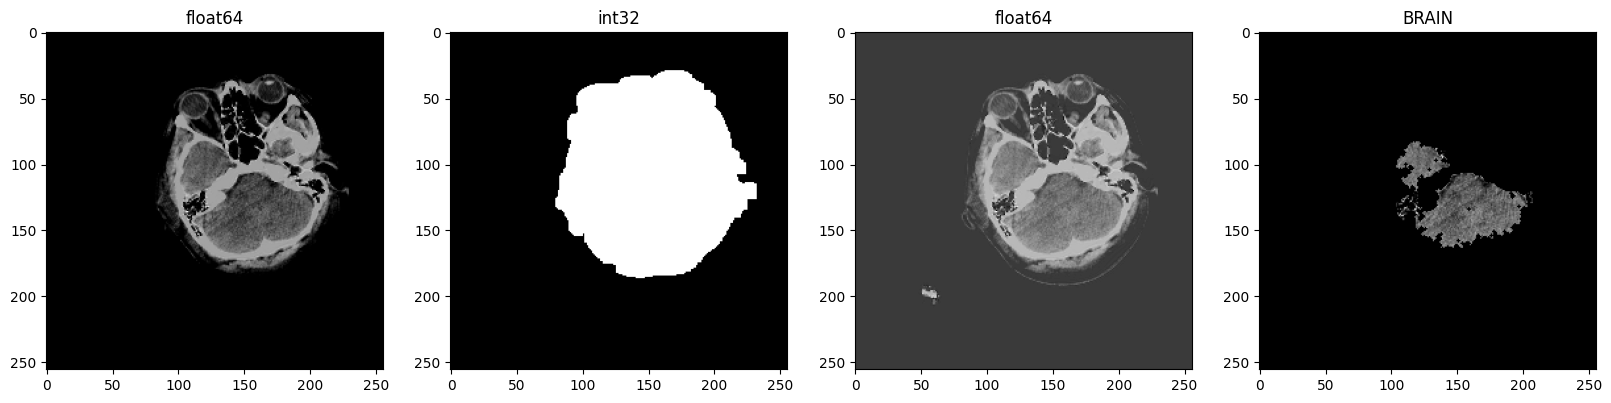

In [12]:

from skimage.morphology import closing
from skimage.measure import label,regionprops


BRAIN =(10 < brain_mask[PATIENT, SLICE]) & (brain_mask[PATIENT, SLICE] < 150)


BRAIN = closing(BRAIN)
# plt.imshow(BRAIN, cmap='gray')
# plt.show()
labels = label(BRAIN)
rps = regionprops(labels)
areas = [r.area for r in rps]
# Find the index of the largest area
largest_area_index = areas.index(max(areas))

# Create a new binary image with only the largest region
largest_area_mask = labels == (largest_area_index + 1)  # Add 1 because labels start from 1

# Display the result with only the largest area

only_brain = largest_area_mask*all_sclices[PATIENT,SLICE]
only_brain[only_brain<=0]=0 
fig = plt.figure(figsize=(20,10))
plt.subplot(1,4,1),plt.imshow(brain_mask[PATIENT,SLICE],cmap='gray'),plt.title(brain_mask.dtype)
plt.subplot(1,4,2),plt.imshow(mask[PATIENT,SLICE],cmap='gray'),plt.title(mask[PATIENT,SLICE].dtype)
plt.subplot(1,4,3),plt.imshow(all_sclices[PATIENT,SLICE],cmap='gray'),plt.title(all_sclices[PATIENT,SLICE].dtype)
plt.subplot(1,4,4),plt.imshow(only_brain,cmap='gray'),plt.title("BRAIN")

PATIENT: 0
SLICE: 19 / 120


(<Axes: title={'center': 'BRAIN'}>,
 Text(0.5, 1.0, 'BRAIN'))

<Figure size 2000x1000 with 0 Axes>

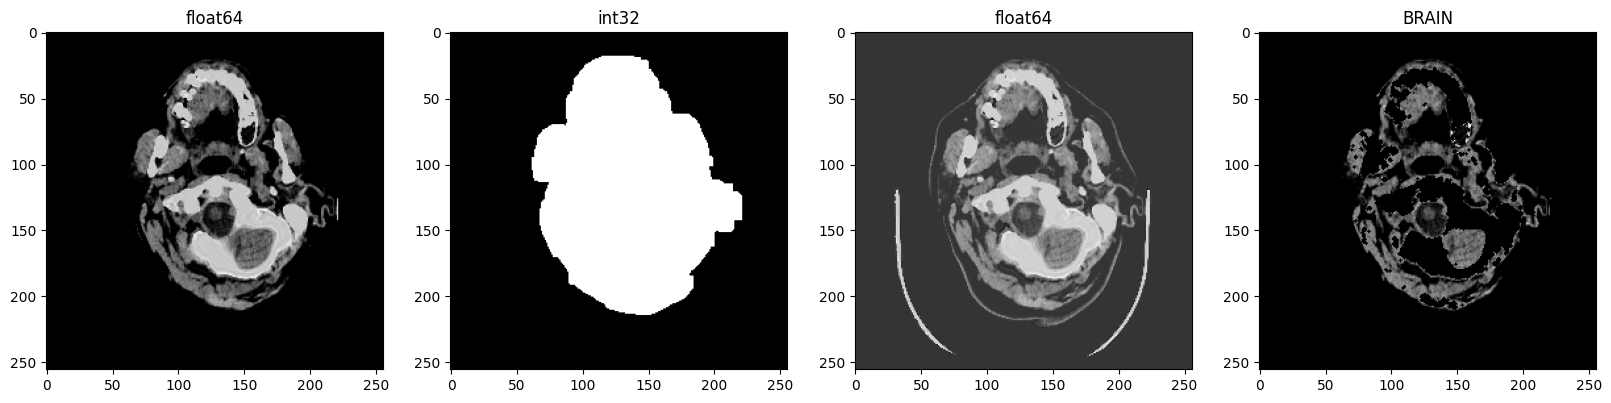

In [32]:
from skimage.morphology import closing
from skimage.measure import label,regionprops

SLICE = np.random.randint(0,all_sclices.shape[1])
PATIENT = np.random.randint(0,all_sclices.shape[0]) 
fig = plt.figure(figsize=(20,10))
mask = np.array(mask,dtype='int32')
print("PATIENT:",PATIENT)
print("SLICE:",SLICE,"/",all_sclices.shape[1])
brain_mask = all_sclices*mask
brain_mask[brain_mask<=0]=0 ############# εγω τυο βαζω αυτό για να ειναι η απόλυτη μάσκα
BRAIN =(10 < brain_mask[PATIENT, SLICE]) & (brain_mask[PATIENT, SLICE] < 150)
BRAIN = closing(BRAIN)
labels = label(BRAIN)
rps = regionprops(labels)
areas = [r.area for r in rps]
# Find the index of the largest area
largest_area_index = areas.index(max(areas))
largest_area_mask = labels == (largest_area_index + 1)  # Add 1 because labels start from 1
only_brain = largest_area_mask*all_sclices[PATIENT,SLICE]
only_brain[only_brain<=0]=0 
fig = plt.figure(figsize=(20,10))
plt.subplot(1,4,1),plt.imshow(brain_mask[PATIENT,SLICE],cmap='gray'),plt.title(brain_mask.dtype)
plt.subplot(1,4,2),plt.imshow(mask[PATIENT,SLICE],cmap='gray'),plt.title(mask[PATIENT,SLICE].dtype)
plt.subplot(1,4,3),plt.imshow(all_sclices[PATIENT,SLICE],cmap='gray'),plt.title(all_sclices[PATIENT,SLICE].dtype)
plt.subplot(1,4,4),plt.imshow(only_brain,cmap='gray'),plt.title("BRAIN")

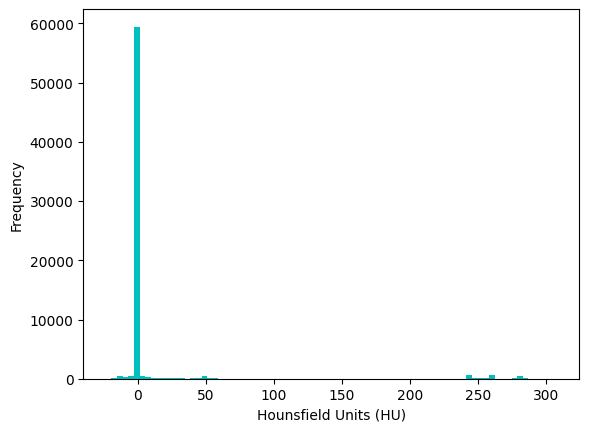

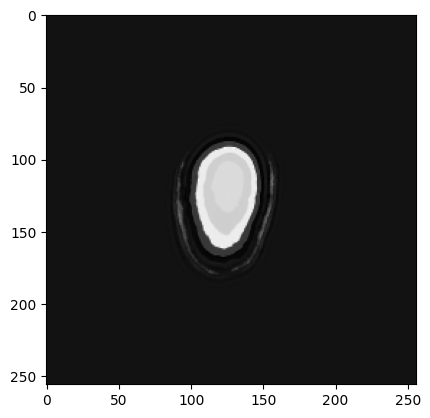

In [31]:

plt.hist(all_sclices[PATIENT,SLICE].flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

# Show some slice in the middle
plt.imshow(all_sclices[PATIENT,SLICE], cmap=plt.cm.gray)
plt.show()